# Simple Linear Regression For Delivery Time Data

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
delivery=pd.read_csv('delivery_time.csv')
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
delivery.describe()   

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
delivery.columns 

Index(['delivery_time', 'sorting_time'], dtype='object')

In [9]:
#  Renaming Columns

delivery=delivery.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
delivery     

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


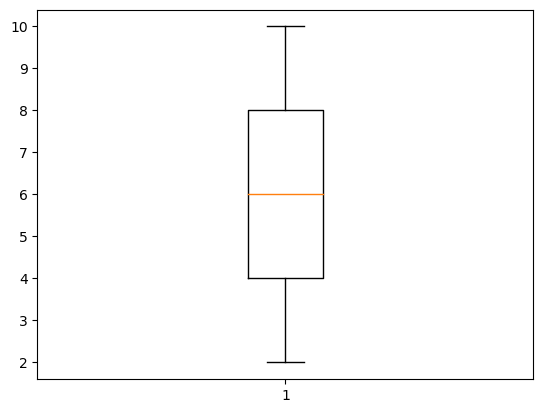

In [11]:
import matplotlib.pyplot as plt
plt.boxplot(delivery.sorting_time) 
plt.show()

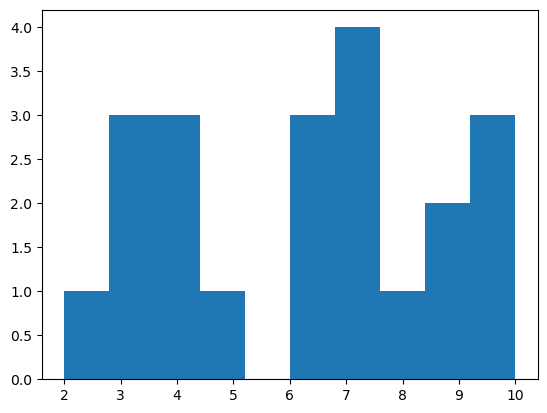

In [12]:
plt.hist(delivery.sorting_time) 
plt.show() 

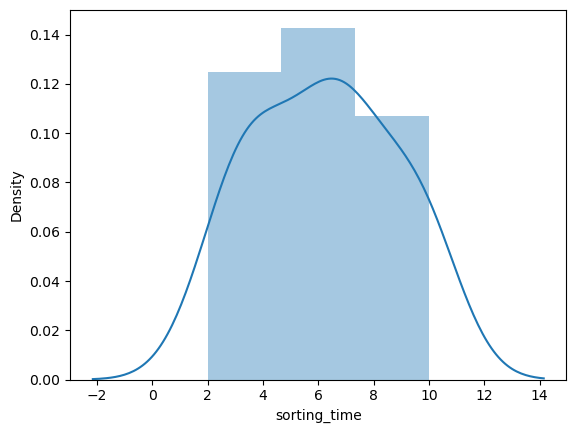

In [13]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.distplot(delivery['sorting_time']) 
plt.show() 

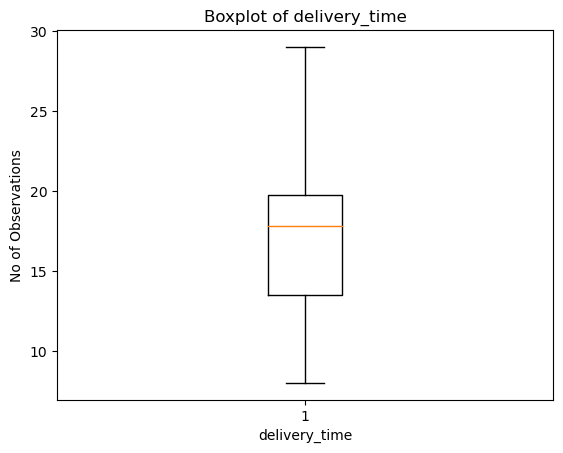

In [14]:
plt.boxplot(delivery.delivery_time) 
plt.xlabel("delivery_time") 
plt.ylabel("No of Observations")
plt.title("Boxplot of delivery_time") 
plt.show()    

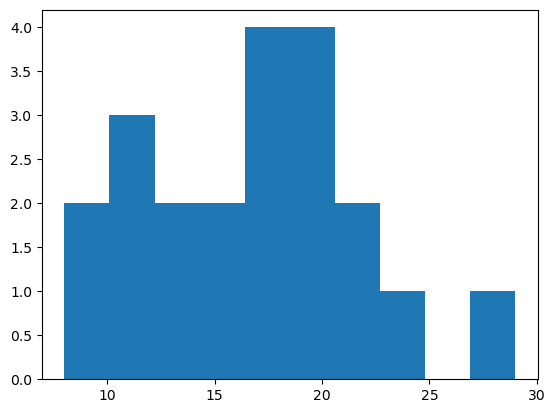

In [16]:
plt.hist(delivery.delivery_time)
plt.show()     

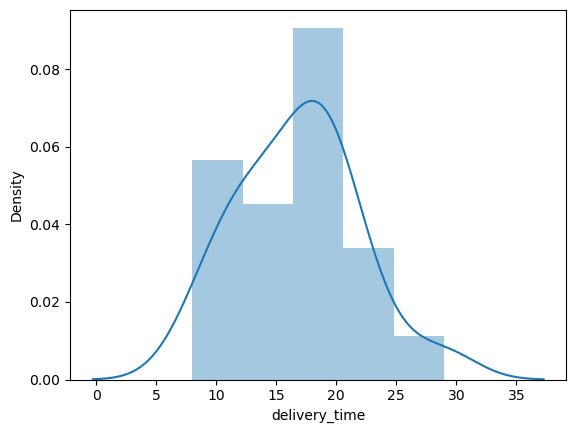

In [17]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.distplot(delivery['delivery_time']) 
plt.show()  

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

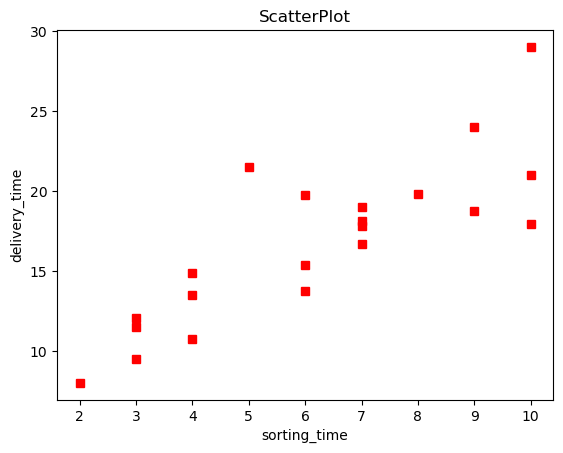

In [18]:
plt.plot(delivery.sorting_time,delivery.delivery_time,"rs")
plt.xlabel("sorting_time")
plt.ylabel("delivery_time")
plt.title("ScatterPlot")   
help(plt.plot) 

# Correlation

In [19]:
delivery.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [20]:
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=delivery).fit()
model.params 

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [21]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        20:53:52   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model.resid 

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

# Predicting The Model

In [23]:
pred = model.predict(delivery.sorting_time)
#pred = model.predict(wcat.iloc[:,0]) 
pred  

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [25]:
 model.resid_pearson 

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [ ]:
#print(model.conf_int(0.05))

In [26]:
rmse_lin = np.sqrt(np.mean((np.array(delivery['delivery_time'])-np.array(pred))**2))
rmse_lin   

2.7916503270617654

Text(0, 0.5, 'delivery_time')

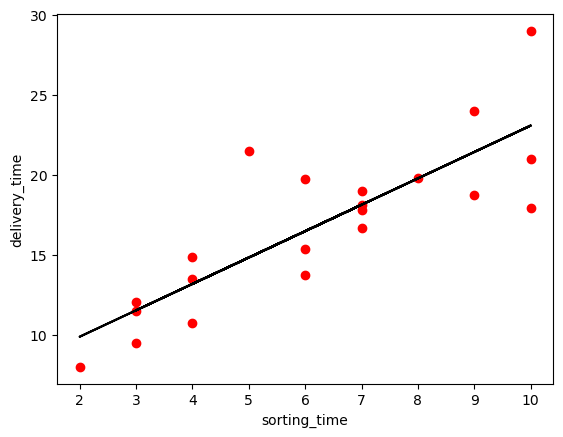

In [28]:
#import matplotlib.pylab as plt
plt.scatter(x=delivery['sorting_time'],y=delivery['delivery_time'],color='red')
plt.plot(delivery['sorting_time'],pred,color='black')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time') 

In [29]:
model2 = smf.ols('delivery_time~np.log(sorting_time)',data=delivery).fit()
#model2.params
#model2.resid 
#model2.resid_pearson 


In [30]:
model2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           2.64e-06
Time:                        21:00:08   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
pred2 = model2.predict(pd.DataFrame(delivery['sorting_time'])) 
pred2  

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [32]:
pred2
rmse_log = np.sqrt(np.mean((np.array(delivery['delivery_time'])-np.array(pred2))**2))
rmse_log   

2.733171476682066

In [33]:
pred2.corr(delivery.delivery_time)

0.8339325279256244

Text(0, 0.5, 'delivery_time')

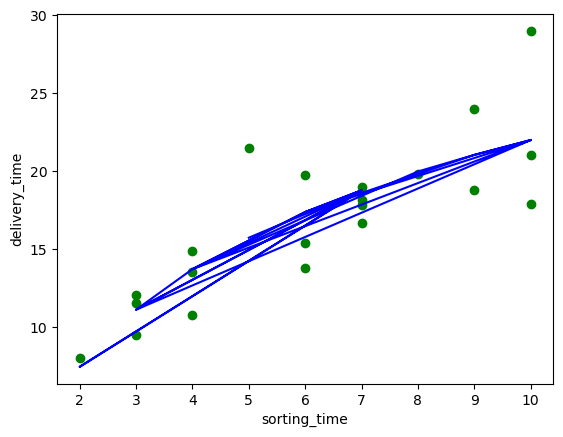

In [34]:
plt.scatter(x=delivery['sorting_time'],y=delivery['delivery_time'],color='green')
plt.plot(delivery['sorting_time'],pred2,color='blue')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time')

In [35]:
#exponential model
model3 = smf.ols('np.log(delivery_time)~sorting_time',data=delivery).fit()
model3.params
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sun, 04 Dec 2022   Prob (F-statistic):           1.59e-06
Time:                           21:04:53   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
pred_log = model3.predict(pd.DataFrame(delivery['sorting_time']))

In [37]:
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [38]:
pred3=np.exp(pred_log)  # as we have used log(delivery_time) in preparing model so we need to convert it back
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [39]:
rmse_exp = np.sqrt(np.mean((np.array(delivery['delivery_time'])-np.array(pred3))**2)) 
rmse_exp 

2.940250323056201

In [40]:
pred3.corr(delivery.delivery_time)

0.808578010828926

Text(0, 0.5, 'delivery_time')

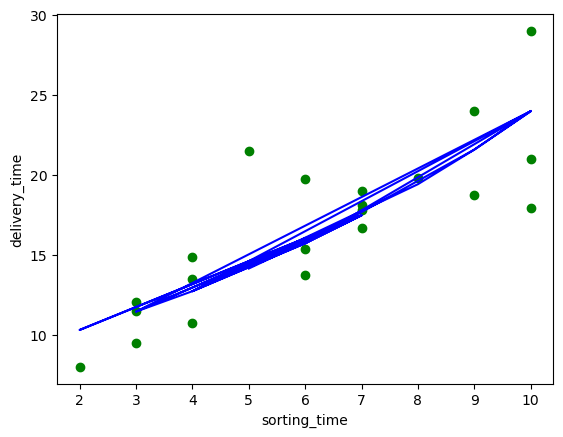

In [41]:
plt.scatter(x=delivery['sorting_time'],y=delivery['delivery_time'],color='green')
plt.plot(delivery.sorting_time,pred3,color='blue')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time')
 

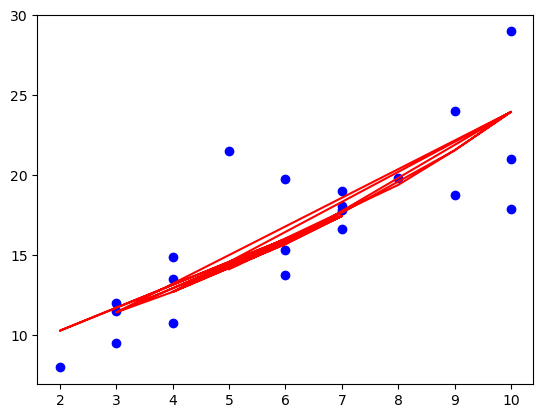

In [42]:
plt.plot(delivery['sorting_time'],delivery['delivery_time'], 'bo')  
plt.plot(delivery.sorting_time,pred3,color='red')

In [43]:
student_resid = model3.resid_pearson 
student_resid

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

Text(0, 0.5, 'Standardized Residual')

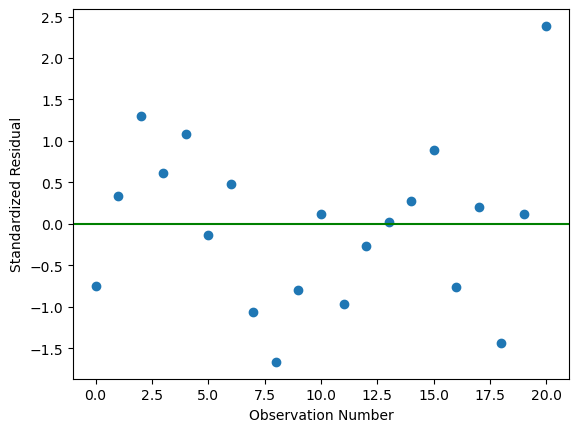

In [44]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual") 

Text(0, 0.5, 'Actual')

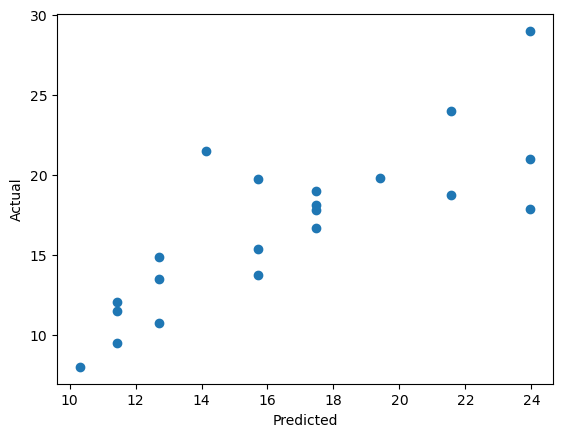

In [45]:
plt.scatter(x=pred3,y=delivery.delivery_time)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [46]:
delivery["sorting_time_Sq"] = delivery.sorting_time+delivery.sorting_time
delivery 

,delivery_time,sorting_time,sorting_time_Sq
0,21.00,10,20
1,13.50,4,8
2,19.75,6,12
3,24.00,9,18
4,29.00,10,20
5,15.35,6,12
6,19.00,7,14
7,9.50,3,6
8,17.90,10,20
9,18.75,9,18


In [47]:
model_quad = smf.ols("np.log(delivery_time)~sorting_time+sorting_time_Sq",data=delivery).fit()
#model_quad.params 

In [48]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sun, 04 Dec 2022   Prob (F-statistic):           1.59e-06
Time:                           21:14:48   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time        0.0211      0.003      6.836      0.000       0.015       0.028
sorting_time_Sq     0.0422      0.006      6.836      0.000       0.029       0.055
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                     5.98e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
pred_quad = model_quad.predict(delivery)
pred4=np.exp(pred_quad)  # as we have used log(delivery_time) in preparing model so we need to convert it back
pred4


0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [50]:
rmse_quad = np.sqrt(np.mean((np.array(delivery['delivery_time'])-np.array(pred4))**2))
rmse_quad 

2.9402503230562007

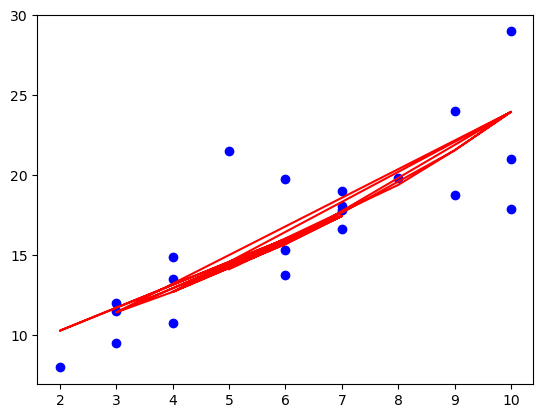

In [51]:
plt.scatter(delivery.sorting_time,delivery.delivery_time,c="b")
plt.plot(delivery.sorting_time,pred4,"r") 

Text(0, 0.5, 'Standardized Residual')

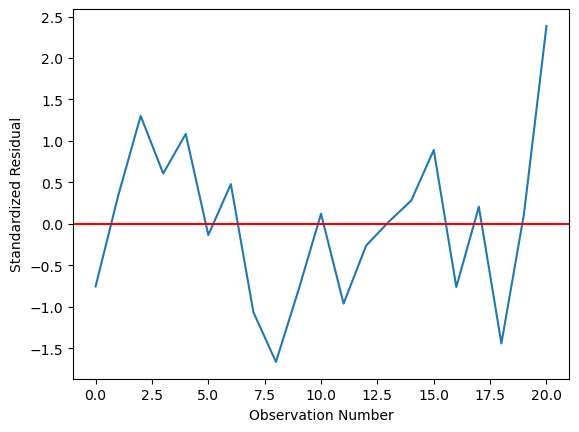

In [52]:
plt.plot(np.arange(21),model_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")   

Text(0, 0.5, 'Standardized Residual')

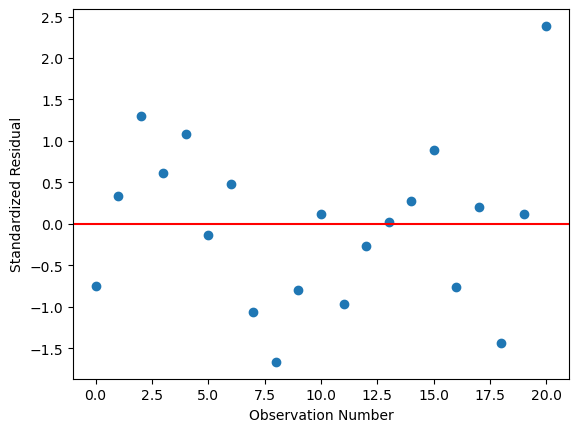

In [53]:
plt.scatter(np.arange(21),model_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")  

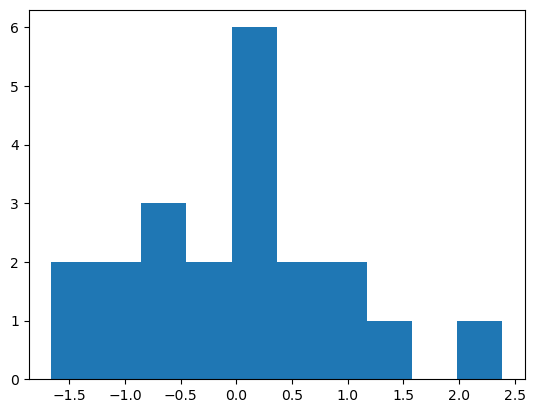

In [54]:
plt.hist(model_quad.resid_pearson)
plt.show() 

In [55]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,2.791650,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_exp,2.940250,0.710948
3,rmse_quad,2.940250,0.710948
